In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#loading the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

**About Dataset**

The dataset consists of several predictor variables and one target variable,Attrition.



Data Loading

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Data Analytics Python Projects/HR_Analytics/HR-Employee-Attrition.csv')

In [4]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Statistical Measure of HR Analytics Data

In [6]:
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

# Data Analysis

Checking is there any null value or not

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Insights:**
1.No null value is depicted

Checking Duplicate

In [8]:
df.duplicated().sum()

0

**Insights:**
No duplicate

In [9]:
df['StandardHours'].value_counts()
# there is only 1 class in StandardHours

80    1470
Name: StandardHours, dtype: int64

Drop Over 18 since in Age column, all employees are older than 18 so it's meaningless
Employercount, StandardHours,EmployeeNumber also offer no meaning

In [10]:
df = df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'], axis =1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [12]:
df['Age'].value_counts().sort_index(ascending = True)

18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
Name: Age, dtype: int64

**Insights**: All employees are over 18

Total number of Attrition and non-attrition

No     1233
Yes     237
Name: Attrition, dtype: int64


Text(0, 0.5, 'Count')

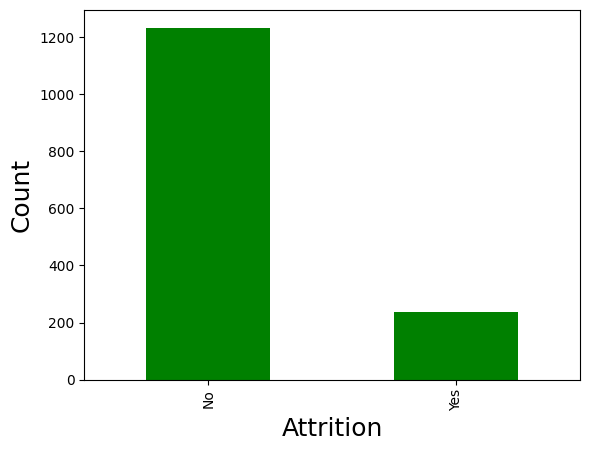

In [13]:
df['Attrition'].value_counts().plot(kind = 'bar', color = 'green')
print(df.Attrition.value_counts())
plt.xlabel('Attrition',fontsize=18)
plt.ylabel('Count',fontsize=18)


Checking all categorical Data

In [22]:
for col in df.describe(include= 'object').columns:
  print(col)
  print(df[col].unique())
  print('-'*50)

Attrition
['Yes' 'No']
--------------------------------------------------
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
--------------------------------------------------
Department
['Sales' 'Research & Development' 'Human Resources']
--------------------------------------------------
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
--------------------------------------------------
Gender
['Female' 'Male']
--------------------------------------------------
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
--------------------------------------------------
MaritalStatus
['Single' 'Married' 'Divorced']
--------------------------------------------------
OverTime
['Yes' 'No']
--------------------------------------------------


**Insights:**


1.   No-> Non-Attrition(Total 1233)
2.   Yes-> Attritions(Total 237)



Select all categorical columns to graph piechart

In [14]:

cat_cols = df.select_dtypes(['object']).columns

cat_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

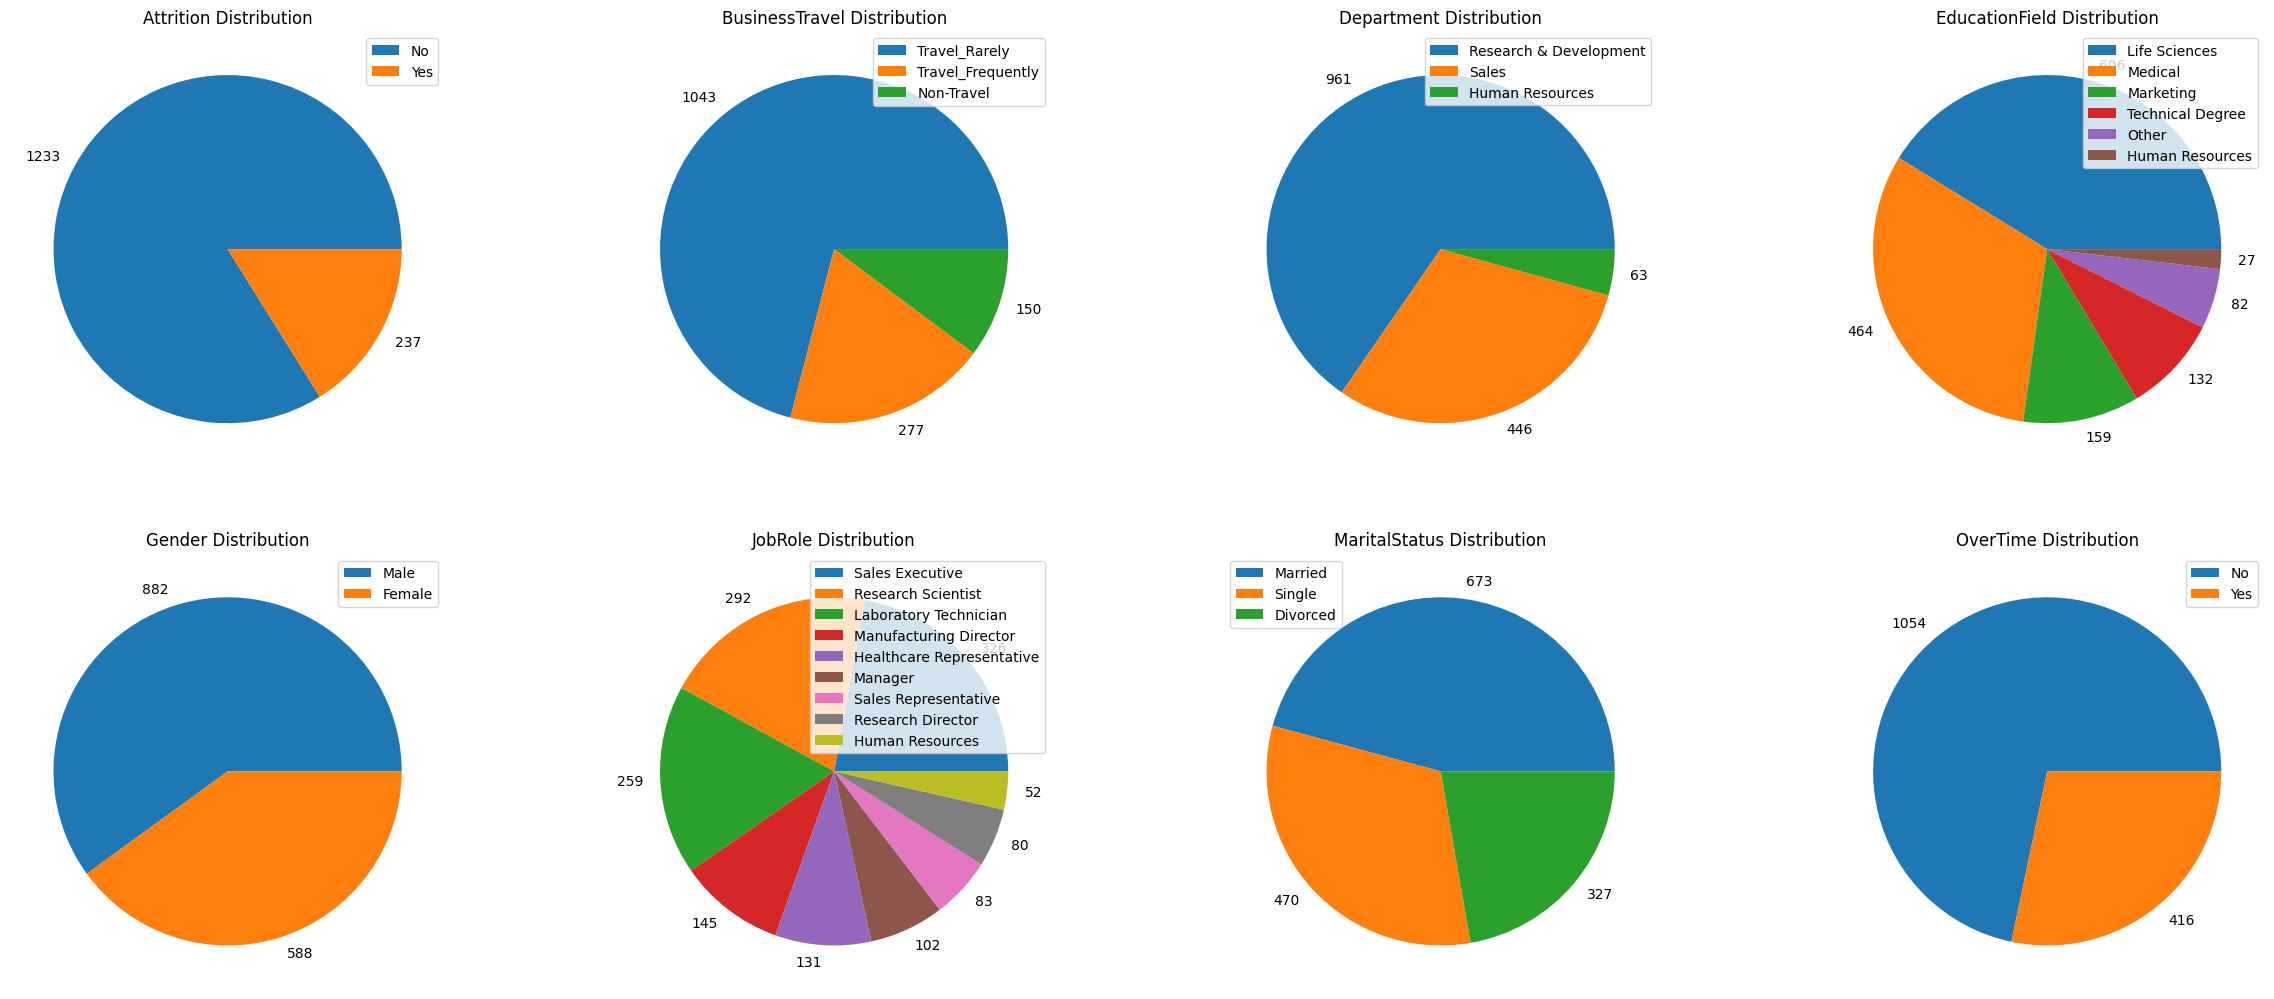

In [15]:
plotnumber=1
plt.figure(figsize=(30,26),facecolor='white')
for col in cat_cols:
    if(plotnumber<=9):
        plt.subplot(4,4,plotnumber)
        plt.pie(df[col].value_counts(), labels=df[col].value_counts().values)
        plt.title(col+" Distribution")
        plt.legend(df[col].value_counts().index)
        plotnumber+=1

In [16]:
# select columns which are categorical except Attrition to graph against Attrition
cat_cols_2 = df.drop('Attrition',axis=1).select_dtypes(['object']).columns
cat_cols_2

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

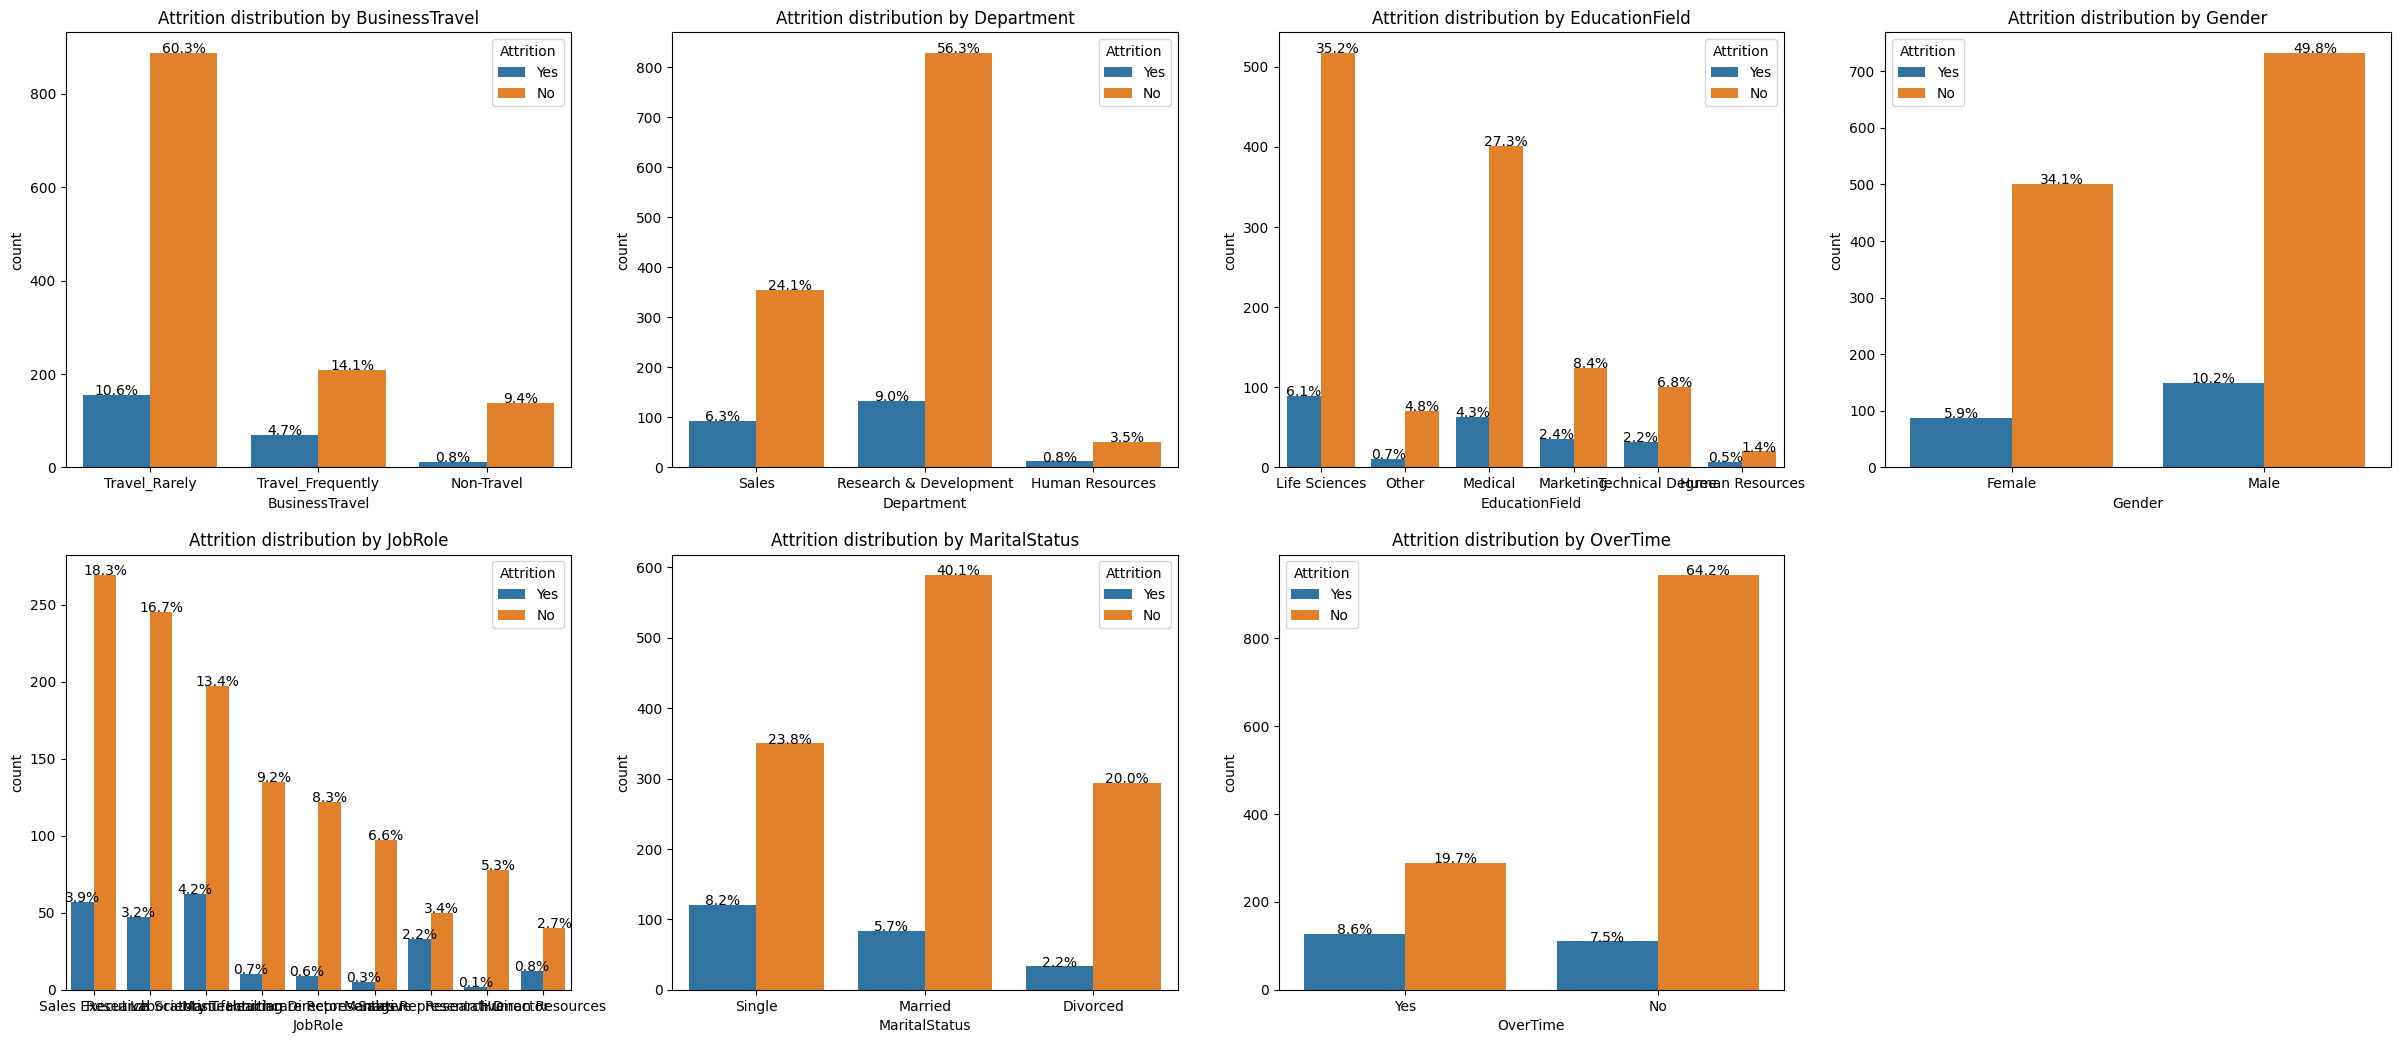

In [17]:
plotnumber=1
plt.figure(figsize=(30,26),facecolor='white')
for col in cat_cols_2:
    if(plotnumber<=9):
        plt.subplot(4,4,plotnumber)
        sns.countplot(x=col, hue='Attrition', data=df)
        plt.title("Attrition distribution by " + col)
        ax = plt.gca()
        total_height = len(df['Attrition'])
        for p in ax.patches:
          percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
          x = p.get_x() + p.get_width() / 2
          y = p.get_height()
          ax.annotate(percentage, (x, y), ha='center')
        plotnumber+=1

**Insights:**


1.   People who do not travel has the least attrition rate of all.
2.   Attrition among men are more than women
3.   Attrition rate among sale representative is high among all the job roles.
4.   Attrition rate among Married is the least when compared to all the other marital status.
5.   Attrition rate is high among people who work overtime



Select variables which are rating from surveying

In [18]:
rating_cols = ['EnvironmentSatisfaction','JobInvolvement', 'JobSatisfaction',
               'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance','StockOptionLevel']

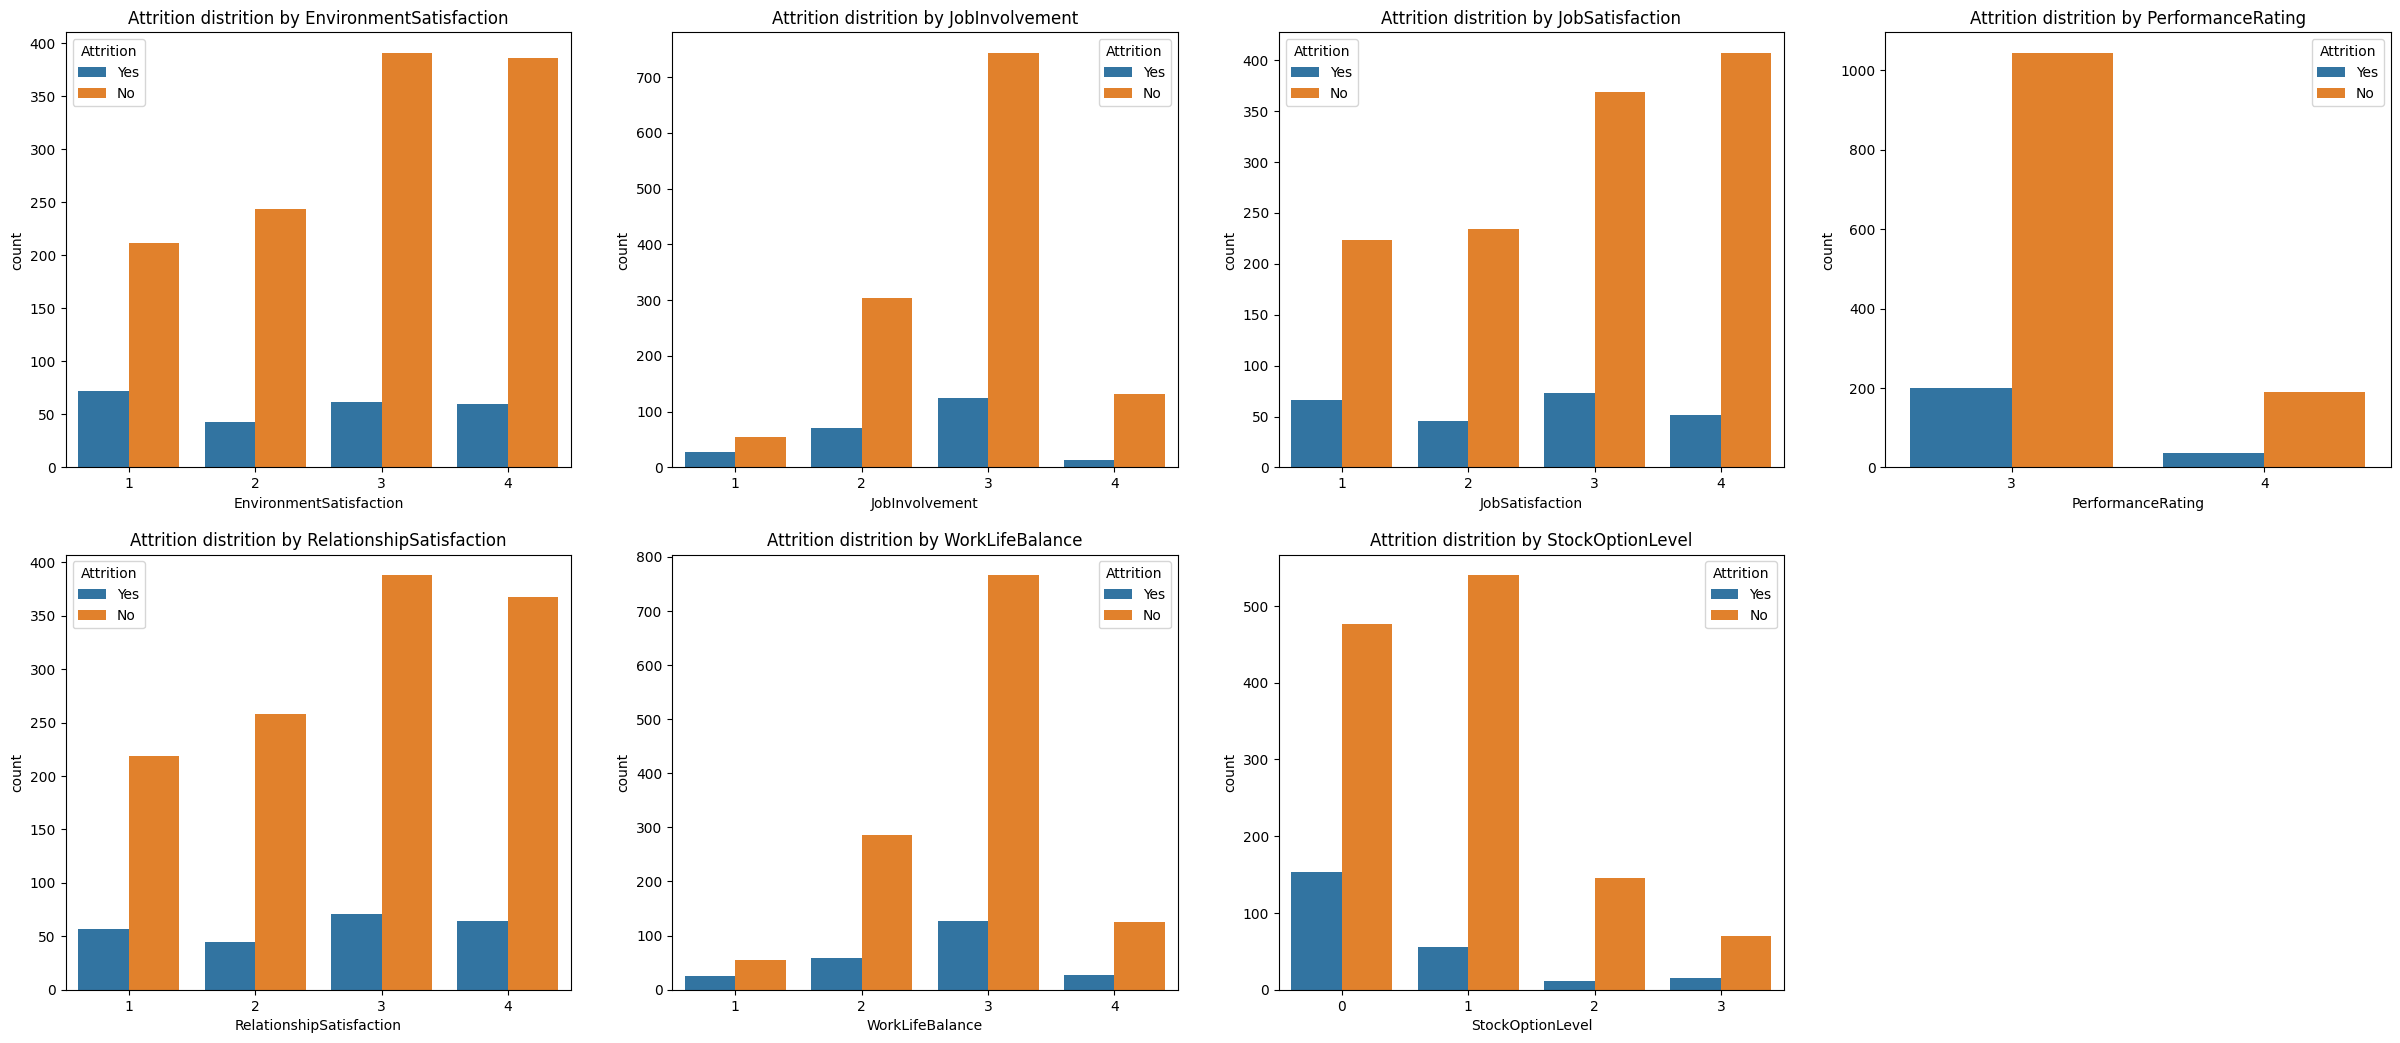

In [19]:
plotnumber=1
plt.figure(figsize=(30,26),facecolor='white')
for col in rating_cols:
    if(plotnumber<=9):
        plt.subplot(4,4,plotnumber)
        sns.countplot(x=col, hue='Attrition', data=df)
        plt.title("Attrition distrition by " + col)
        plotnumber+=1

**Insights:**


1.   At jobinvolvement = 1, both attrition rates are very low.
2.   At Performancerating = 3, both attrition rates are at their highest.
3.   At Relationshipsatifaction and WorkLifeBalance = 3, both attrition rates are at their highest.



In [23]:
num_cols = ['Age', 'DistanceFromHome','NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

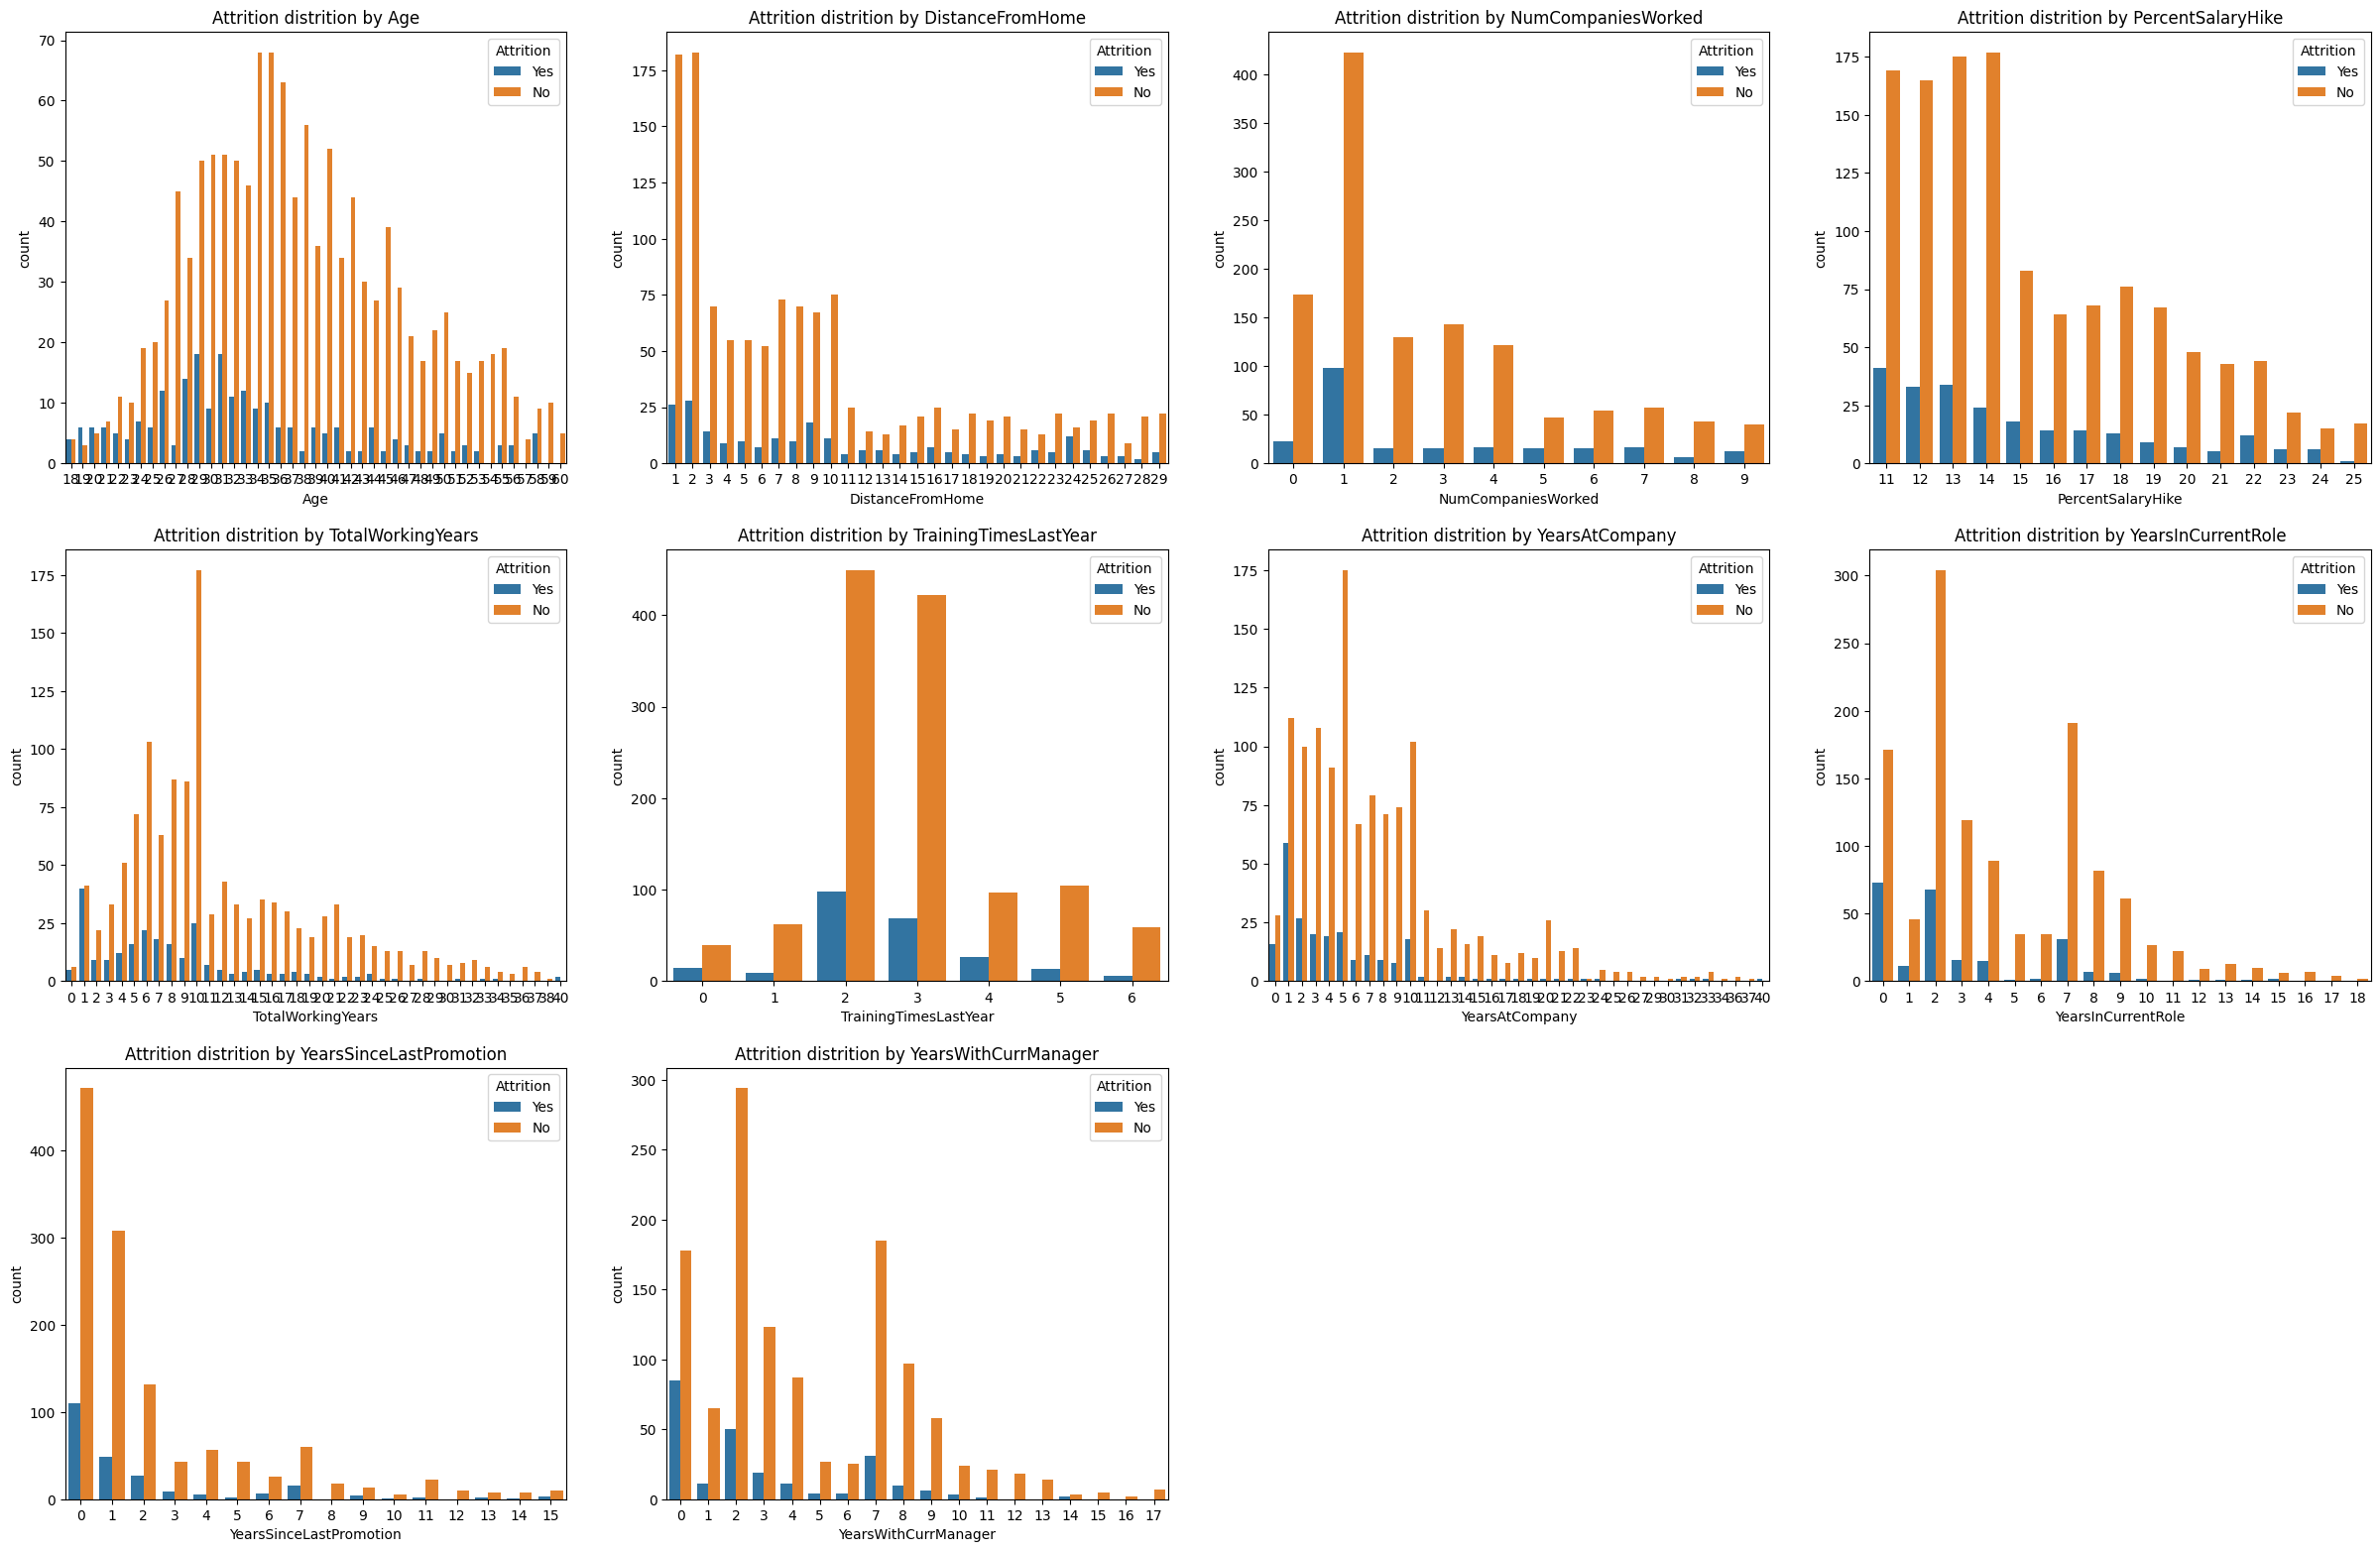

In [24]:
plotnumber=1
plt.figure(figsize=(30,26),facecolor='white')
for col in num_cols:
    if(plotnumber<=11):
        plt.subplot(4,4,plotnumber)
        sns.countplot(x=col, hue='Attrition', data=df)
        plt.title("Attrition distrition by " + col)
        plotnumber+=1

**Insights:**


1.   Between the age groups 29-33 , Attritiion rate is high
2.   Attrition rate is high among employees upto 13%




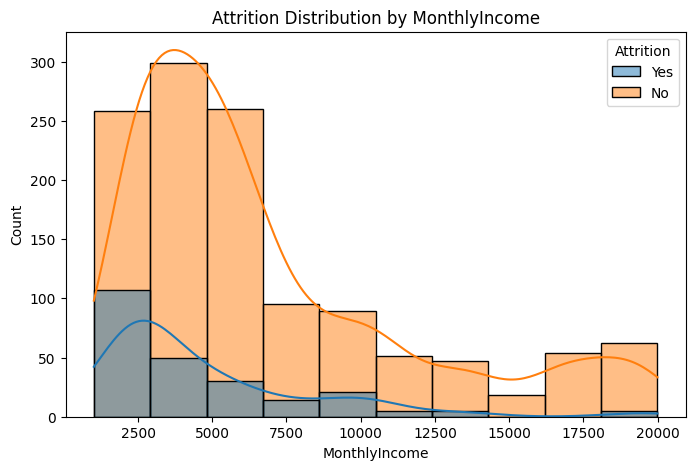

In [27]:
plt.figure(figsize=(8,5))
plt.title('Attrition Distribution by MonthlyIncome')
sns.histplot(data=df,x='MonthlyIncome',hue='Attrition',bins=10,kde=True)
plt.show()

**Insights:**

 Attrition rate is high among employees with monthly income range upto 2700